In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

# Question A
Since our prior belief is uniform, it does not affect the posterior in any way. Thus, we do not need to define any prior.

2 * Std:  0.09822181403575912
0.4817781859642408
0.6782218140357591


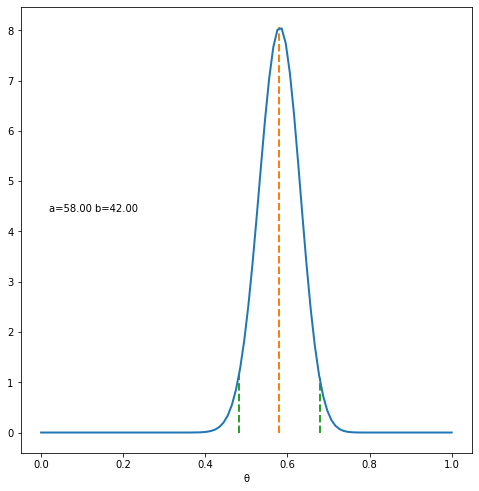

In [4]:
fig, ax = plt.subplots(1, figsize=(7,7))
fig.tight_layout()
fig.subplots_adjust(top=0.94)

param_kappa = 8
domain = np.linspace(0.0, 1.0, 100)

a = 58
b = 42

def plot_beta (ax, a, b, kappa):
    with pm.Model():
        beta = pm.Beta(
            name=f"theta", 
            alpha=a,
            beta=b,
            transform=None
        )

        image = [ math.exp( beta.logp( {"theta": theta} ) ) 
                    for theta in domain
        ]
        
        mu = a / (a + b)
        
        variance = (a*b) / (((a+b)**2)*(a+b+1))
        std = math.sqrt(variance)
        print("2 * Std: ",2*std)
        print(mu-2*std)
        print(mu+2*std)
        y1_max = math.exp(beta.logp({"theta": mu-2*std}))
        y2_max = math.exp(beta.logp({"theta": mu+2*std}))
        mu_max = math.exp(beta.logp({"theta": mu}))
        
        ax.vlines([mu], ymin=0, ymax=mu_max, color='C1', ls='--', linewidth=2)
        ax.vlines([mu-2*std], ymin=0, ymax=y1_max, color='C2', ls='--', linewidth=2)
        ax.vlines([mu+2*std], ymin=0, ymax=y2_max, color='C2', ls='--', linewidth=2)
        ax.plot(domain, image, linewidth=2)
        ax.text(0.02, 4.4, f"a={a:0.2f} b={b:0.2f}")
        ax.set_xlabel('θ')
        


plot_beta(ax, a, b, param_kappa)
    
plt.show()

The HDI is +-0.09822181403575912